In [3]:
from scipy.stats  import bernoulli, beta, poisson, expon
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress = True)

# Probability Distributions

# Discrete Case

## Poisson
$E [Z|\lambda] = \lambda$ 

In [4]:
k = np.arange(16)
lambda_ = 1.5
dst_poi = poisson.pmf(k,lambda_)
dst_poi

array([0.22313016, 0.33469524, 0.25102143, 0.12551072, 0.04706652,
       0.01411996, 0.00352999, 0.00075643, 0.00014183, 0.00002364,
       0.00000355, 0.00000048, 0.00000006, 0.00000001, 0.        ,
       0.        ])

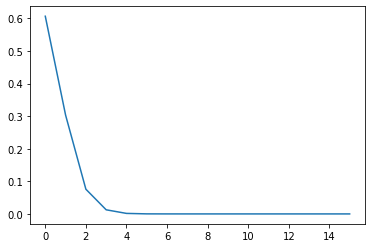

In [8]:
plt.plot(k, dst_poi)

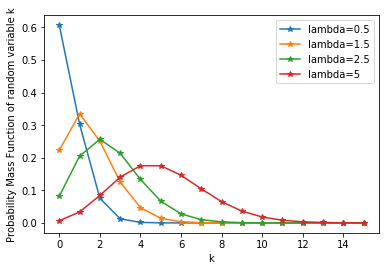

In [18]:
plt.plot(k, poisson.pmf(k,0.5),'*-', label='lambda=0.5')
plt.plot(k, poisson.pmf(k,1.5),'*-', label='lambda=1.5')
plt.plot(k, poisson.pmf(k,2.5),'*-', label='lambda=2.5')
plt.plot(k, poisson.pmf(k,5),'*-', label='lambda=5')
plt.xlabel("k")
plt.ylabel("Probability Mass Function of random variable k")
plt.legend()

<BarContainer object of 16 artists>

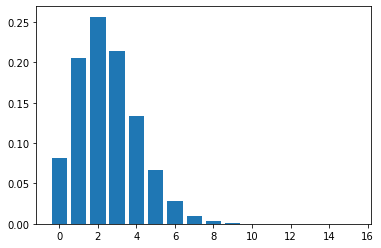

In [19]:
plt.bar(k,dst_poi)

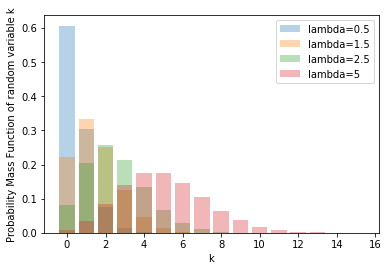

In [24]:
plt.bar(k, poisson.pmf(k,0.5), label='lambda=0.5', alpha=0.33)
plt.bar(k, poisson.pmf(k,1.5), label='lambda=1.5', alpha=0.33)
plt.bar(k, poisson.pmf(k,2.5), label='lambda=2.5', alpha=0.33)
plt.bar(k, poisson.pmf(k,5), label='lambda=5', alpha=0.33)
plt.xlabel("k")
plt.ylabel("Probability Mass Function of random variable k")
plt.legend()

# Continuous Case
## Exponential Distribution
$E [Z|\lambda] = 1/\lambda$ 

In [33]:
k = np.linspace(0, 4, 100)
print (k)
lambda_ = 0.5
dst_expo = expon.pdf(k, scale = 1.0/lambda_)

[0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454545 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474747 3.51515152 3.55555556 3.595959

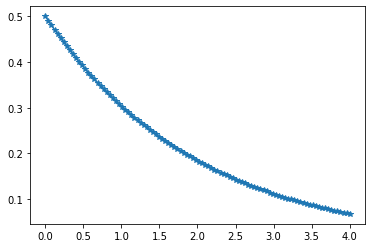

In [35]:
plt.plot(k,dst_expo, "*-")

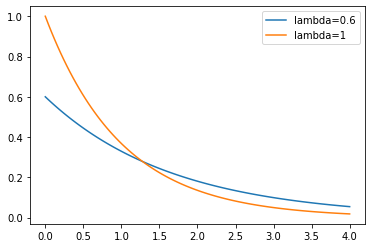

In [41]:
plt.plot(k,expon.pdf(k, scale = 1.0/0.6), label='lambda=0.6')
plt.plot(k,expon.pdf(k, scale = 1.0/1), label='lambda=1')
plt.legend()
#plt.plot(k,expon.pdf(k, scale = 1.0/2))
#plt.plot(k,expon.pdf(k, scale = 1.0/3))
#plt.plot(k,expon.pdf(k, scale = 1.0/5))

# Bayesian Inference Example

In [5]:
data_count = np.loadtxt("./data/txtdata.csv")

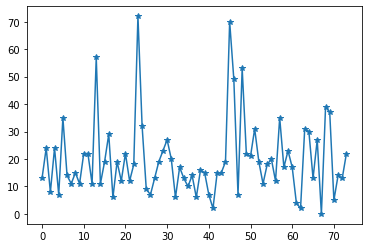

In [6]:
plt.plot(data_count, '*-' )

<BarContainer object of 74 artists>

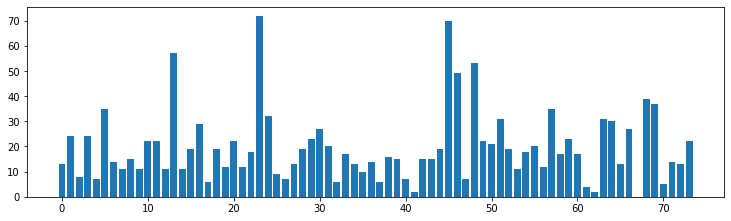

In [7]:
from IPython.core.pylabtools import figsize
figsize(12.5, 3.5)
plt.bar(np.arange(len(data_count)) , data_count)

### Modelling data with Poisson Distirbution 
We use Poisson as the data is continuous and Poisson models a distribution for Discrete Data.

We can assume that our data is modeled by 2 Poisson distributions. One of them before \Tau and the other afterwards.

 $$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$


## What is a good value for $\lambda$?
We also need to model $\lambda$. We can assume that $ \lambda $ is a random variable that follows the probability distribution 

We can assume that "\lambda" is a Random Variable that behaves following an exponential Distribution. Our imported data is discrete, but our \lambda is continuous. Therefore, we use a distribution for continuous data. 

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}


Now we have a new unknown variable: $\alpha$.  

## What is a good value for  $\alpha$?
The Expectation or mean of a random variable $\lambda_1$ for example modelled by an Exponential Distribution is $1/\alpha$. Therefore:
$$
\alpha = 1/mean
$$


In [9]:
alpha = 1/data_count.mean()
alpha

0.05065023956194388

Eureka! :)

In [1]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
